# BME 544 Assignment 5

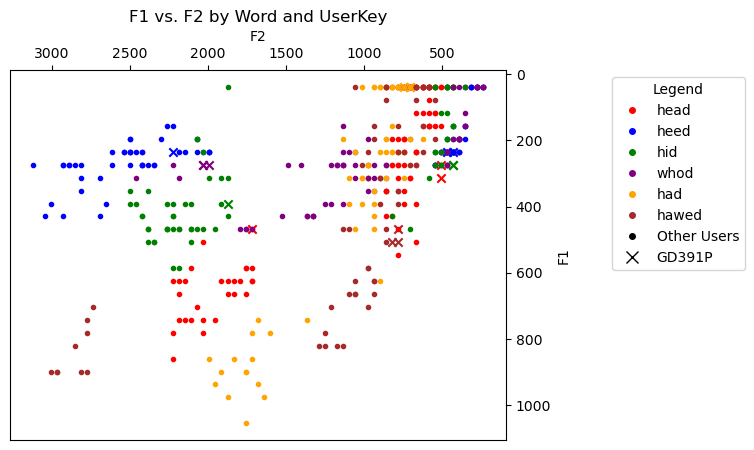

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines

# Read CSV file
data_file = "FormantEstimates.csv"  # Update with the actual file path
df = pd.read_csv(data_file)

# Define unique colors for each word
word_colors = {
    "head": "red",
    "heed": "blue",
    "hid": "green",
    "whod": "purple",
    "had": "orange",
    "hawed": "brown"
}

# Define symbols for user keys
user_symbols = {"GD391P": "x"}  # Unique symbol for GD391P
default_symbol = "."  # Default symbol for all other user keys

fig, ax = plt.subplots()

# Plot each data point
for (user, word), group in df.groupby(["UserKey", "Word"]):
    f1 = group["F1"].values
    f2 = group["F2"].values
    marker = user_symbols.get(user, default_symbol)
    ax.scatter(f2, f1, c=word_colors.get(word, "black"), marker=marker, label=f"{word} ({user})")

# Customize axes (invert to match requested orientation)
ax.invert_xaxis()  # F2 increases leftwards
ax.invert_yaxis()  # F1 increases downwards

# Position the axes
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()

ax.set_xlabel("F2")
ax.set_ylabel("F1")
ax.set_title("F1 vs. F2 by Word and UserKey")

# Create custom legend
word_legend = [mlines.Line2D([0], [0], color=color, marker='.', linestyle='None', markersize=8, label=word) for word, color in word_colors.items()]
user_legend = [mlines.Line2D([0], [0], color='black', marker=symbol, linestyle='None', markersize=8, label="GD391P" if symbol == "x" else "Other Users") for symbol in set(user_symbols.values()) | {default_symbol}]
legend = ax.legend(handles=word_legend + user_legend, title="Legend", loc='upper left', bbox_to_anchor=(1.2, 1))

plt.show()